# FIG CESM run evaluations

In [1]:
import os
import sys
import yaml
import argparse
from glob import glob
from datetime import datetime, timedelta

import numpy as np
import xarray as xr

sys.path.insert(0, os.path.realpath('../libs/'))
import graph_utils as gu
#import verif_utils as vu

In [2]:
import pandas as pd

In [3]:
import matplotlib.dates as mdates

In [4]:
import cmaps
# graph tools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import matplotlib.colorbar as cbar
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature

%matplotlib inline

In [5]:
import matplotlib.lines as mlines

In [6]:
from matplotlib.colors import Normalize

In [7]:
fig_keys = {
    'dpi': 150, 
    'orientation':'portrait', 
    'bbox_inches':'tight', 
    'pad_inches':0.1, 
    'transparent':False
}

In [91]:
need_publish = True

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

## Prep data

In [28]:
varname_pick = ['WRF_TMAX', 'WRF_TMIN']

dict_PLOT = {}

for exp_name in ['B3H', 'B6H', 'GDAS', 'target']:
    ds_collection = []
    for year in range(2021, 2025):
        # final_B3H_2024_WY_daily.zarr
        if exp_name == 'target':
            ds = xr.open_zarr(f'/glade/campaign/ral/hap/ksha/GWC_results/FINAL_run/{exp_name}_{year}_WY_daily.zarr')
        else:
            ds = xr.open_zarr(f'/glade/campaign/ral/hap/ksha/GWC_results/FINAL_run/final_{exp_name}_{year}_WY_daily.zarr')
        ds = ds[varname_pick]
        ds_collection.append(ds)
            
    ds_all = xr.concat(ds_collection, dim='time')
    
    for i_var, varname in enumerate(varname_pick):
        dict_PLOT[f'{exp_name}_{varname}'] = ds_all[varname].values.ravel()

In [11]:
dict_CYCLE = {}

for exp_name in ['B3H', 'B6H', 'GDAS', 'target']:
    fn = f'/glade/campaign/ral/hap/ksha/GWC_results/clim/area_weighted_mean_{exp_name}_cycle.zarr'
    ds = xr.open_zarr(fn)
    dict_CYCLE[exp_name] = ds['WRF_T2'].values

## Plot

In [12]:
my_colors = gu.ksha_color_set_summon(color_set=0)
cyan = my_colors['cyan']
blue = my_colors['blue']
red = my_colors['red']
orange = my_colors['orange']

In [13]:
line_keys = {}
line_keys['B3H'] = {'linewidth': 4, 'linestyle': '--', 'color': blue, 'alpha': 1, 'zorder': 3, 'label': ''}
line_keys['B6H'] = {'linewidth': 4, 'linestyle': '--', 'color': red, 'alpha': 1, 'zorder': 4, 'label': ''}
line_keys['GDAS'] = {'linewidth': 4, 'linestyle': '-', 'color': orange, 'alpha': 1, 'zorder': 2, 'label': ''}
line_keys['target'] = {'linewidth': 6, 'linestyle': '-', 'color': '0.75', 'alpha': 1, 'zorder': 1, 'label': ''}

In [50]:
cmap_hist = cmaps.amwg #t2m_29lev #gu.precip_cmap(return_rgb=False, land_map=False)

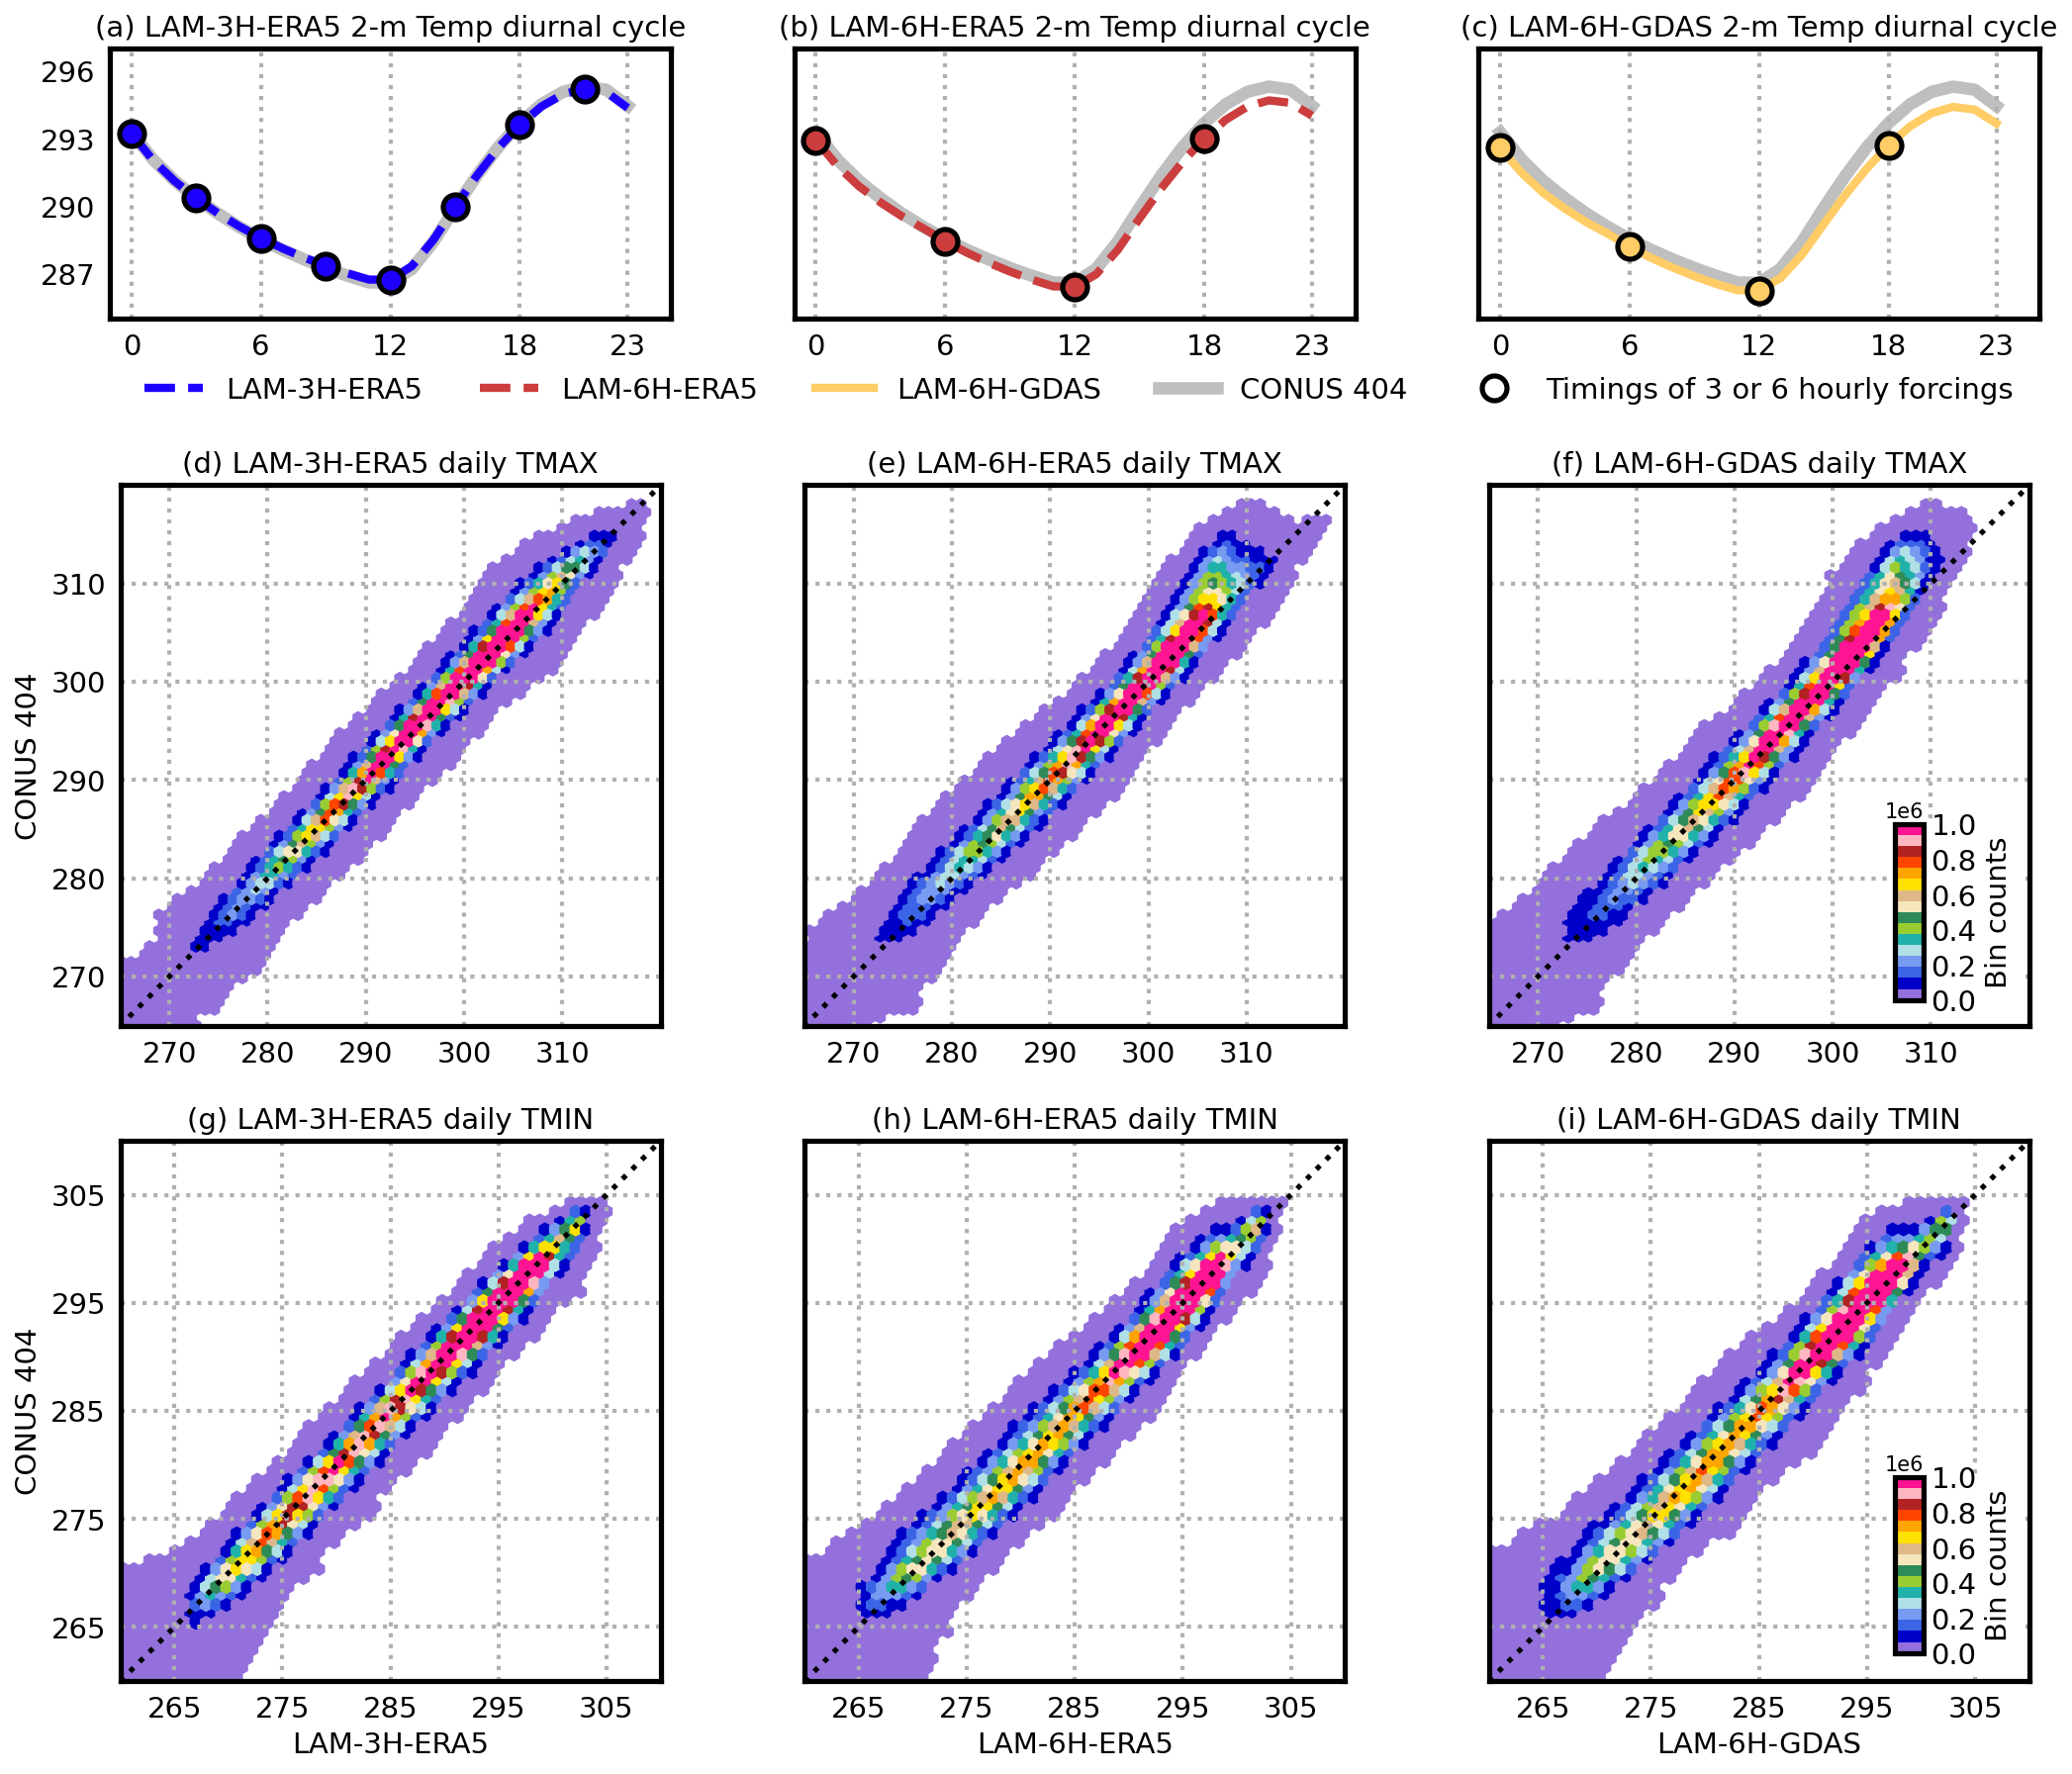

In [120]:
fig = plt.figure(figsize=(13, 11), dpi=dpi_)
gs = gridspec.GridSpec(5, 3, height_ratios=[0.5, 0.1, 1, 0.005, 1], width_ratios=[1, 1, 1])

AX_lines = []
AX_lines.append(plt.subplot(gs[0, 0]))
AX_lines.append(plt.subplot(gs[0, 1]))
AX_lines.append(plt.subplot(gs[0, 2]))

AX_hist = []
AX_hist.append(plt.subplot(gs[2, 0]))
AX_hist.append(plt.subplot(gs[2, 1]))
AX_hist.append(plt.subplot(gs[2, 2]))

AX_hist.append(plt.subplot(gs[4, 0]))
AX_hist.append(plt.subplot(gs[4, 1]))
AX_hist.append(plt.subplot(gs[4, 2]))

for ax in AX_lines + AX_hist:
    ax = gu.ax_decorate_box(ax)

for ax in AX_lines:
    ax.tick_params(labelbottom=True, labelsize=14)
    ax.set_ylim([285, 297])
    ax.set_yticks([287, 290, 293, 296])
    
    ax.set_xlim([-1, 25])
    ax.set_xticks([0, 6, 12, 18, 23])
    ax.grid(linestyle=':', axis='x', lw=2)
    
AX_lines[0].tick_params(labelleft=True, labelsize=14)
AX_hist[0].tick_params(labelleft=True, labelsize=14)
AX_hist[3].tick_params(labelleft=True, labelsize=14)

for ax in AX_hist[:3]:
    ax.tick_params(labelbottom=True, labelsize=14)
    ax.set_xlim([265, 320])
    ax.set_xticks([270, 280, 290, 300, 310])
    ax.set_ylim([265, 320])
    ax.set_yticks([270, 280, 290, 300, 310])
    ax.grid(linestyle=':', lw=2)

for ax in AX_hist[3:]:
    ax.tick_params(labelbottom=True, labelsize=14)
    ax.set_xlim([260, 310])
    ax.set_xticks([265, 275, 285, 295, 305])
    ax.set_ylim([260, 310])
    ax.set_yticks([265, 275, 285, 295, 305])
    ax.grid(linestyle=':', lw=2)

fake_x = np.linspace(260, 320, 50)
for ax in AX_hist:
    ax.plot(fake_x, fake_x, ':', lw=2.5, color='k')

AX_hist[0].set_ylabel('CONUS 404', fontsize=14)
AX_hist[3].set_ylabel('CONUS 404', fontsize=14)

AX_hist[3].set_xlabel('LAM-3H-ERA5', fontsize=14)
AX_hist[4].set_xlabel('LAM-6H-ERA5', fontsize=14)
AX_hist[5].set_xlabel('LAM-6H-GDAS', fontsize=14)

plt.subplots_adjust(0, 0, 1, 1, hspace=0.2, wspace=0.22)

fake_x = np.arange(24)

forcing_hours = [3, 6, 6]

norm = Normalize(1, 25)
ref_x = np.linspace(250, 350, 10)

# 'B3H', 'B6H', 'GDAS'
for i_exp, exp_name in enumerate(['B3H', 'B6H', 'GDAS']):
    h_ = forcing_hours[i_exp]
    AX_lines[i_exp].plot(fake_x, dict_CYCLE[exp_name][0, :], **line_keys[exp_name])
    AX_lines[i_exp].plot(
        fake_x[::h_], dict_CYCLE[exp_name][0, ::h_], 
        linestyle='none', marker='o', ms=12, mfc=line_keys[exp_name]['color'], mec='k', mew=2.5, zorder=4)
    
    AX_lines[i_exp].plot(fake_x, dict_CYCLE['target'][0, :], **line_keys['target'])
    
    hb1 = AX_hist[i_exp].hexbin(
        dict_PLOT[f'{exp_name}_WRF_TMAX'], dict_PLOT['target_WRF_TMAX'],
        gridsize=80,
        cmap=cmap_hist,
        mincnt=2000,
        vmin=2000, vmax=1000000,
        bins=None,
    )
    
    AX_hist[i_exp].set_aspect('equal', adjustable='box')

    hb2 = AX_hist[i_exp+3].hexbin(
        dict_PLOT[f'{exp_name}_WRF_TMIN'], dict_PLOT['target_WRF_TMIN'], 
        gridsize=80,
        cmap=cmap_hist,
        mincnt=2000,
        vmin=2000, vmax=1000000,
        bins=None,
    )
    
    AX_hist[i_exp+3].set_aspect('equal', adjustable='box')

AX_lines[0].set_title('(a) LAM-3H-ERA5 2-m Temp diurnal cycle', fontsize=14)
AX_lines[1].set_title('(b) LAM-6H-ERA5 2-m Temp diurnal cycle', fontsize=14)
AX_lines[2].set_title('(c) LAM-6H-GDAS 2-m Temp diurnal cycle', fontsize=14)

AX_hist[0].set_title('(d) LAM-3H-ERA5 daily TMAX', fontsize=14)
AX_hist[1].set_title('(e) LAM-6H-ERA5 daily TMAX', fontsize=14)
AX_hist[2].set_title('(f) LAM-6H-GDAS daily TMAX', fontsize=14)

AX_hist[3].set_title('(g) LAM-3H-ERA5 daily TMIN', fontsize=14)
AX_hist[4].set_title('(h) LAM-6H-ERA5 daily TMIN', fontsize=14)
AX_hist[5].set_title('(i) LAM-6H-GDAS daily TMIN', fontsize=14)

ax_base2 = fig.add_axes([0.925, 0.405, 0.068, 0.12])
[j.set_linewidth(0) for j in ax_base2.spines.values()]
ax_base2.tick_params(
    axis='both', left=False, top=False, right=False, bottom=False, 
    labelleft=False, labeltop=False, labelright=False, labelbottom=False
)
cax2 = inset_axes(ax_base2, height='90%', width='22%', borderpad=0, loc=2)
CBar2 = plt.colorbar(hb1, orientation='vertical', cax=cax2)
CBar2.ax.tick_params(axis='y', labelsize=14, direction='in', length=0)
CBar2.outline.set_linewidth(2.5)
CBar2.set_ticks([0, 200000, 400000, 600000, 800000, 1000000])
# CBar2.set_ticklabels(['1', '400 k', '800 k', '1200 k'])
CBar2.ax.set_ylabel('Bin counts', fontsize=14)

ax_base1 = fig.add_axes([0.925, 0.005, 0.068, 0.12])
[j.set_linewidth(0) for j in ax_base1.spines.values()]
ax_base1.tick_params(
    axis='both', left=False, top=False, right=False, bottom=False, 
    labelleft=False, labeltop=False, labelright=False, labelbottom=False
)
cax1 = inset_axes(ax_base1, height='90%', width='22%', borderpad=0, loc=2)
CBar1 = plt.colorbar(hb1, orientation='vertical', cax=cax1)
CBar1.ax.tick_params(axis='y', labelsize=14, direction='in', length=0)
CBar1.outline.set_linewidth(2.5)
CBar1.set_ticks([0, 200000, 400000, 600000, 800000, 1000000])
# CBar1.set_ticklabels(['1', '400 k', '800 k', '1200 k'])
CBar1.ax.set_ylabel('Bin counts', fontsize=14)

handle_legneds1 = []
handle_legneds1.append(mlines.Line2D([], [], **line_keys['B3H']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['B6H']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['GDAS']))
handle_legneds1.append(mlines.Line2D([], [], **line_keys['target']))
handle_legneds1.append(mlines.Line2D([], [], ls='none', marker='o', ms=12, mfc='none', mec='k', mew=2.5))

ax_lg1 = fig.add_axes([0, 0.765, 1, 0.05])
LG1 = ax_lg1.legend(
    handle_legneds1, 
    ['LAM-3H-ERA5', 'LAM-6H-ERA5', 'LAM-6H-GDAS', 'CONUS 404', 'Timings of 3 or 6 hourly forcings'], 
    bbox_to_anchor=(1, 1), ncol=5, prop={'size':14}
)

#ax_base2.set_axis_off()
LG1 = gu.lg_box(LG1)
ax_lg1.set_axis_off()